In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt

%matplotlib inline

#pd.set_option("display.max_rows", 10)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 5.0)


from sklearn.model_selection import cross_val_score

## Metrics

There are various different metric of how to measure you algorithm quality. In this exercise we will use ROC AUC. It is simply area under the curve(that is why AUC - area under curve). ROC if a plot of TPR - true positive rate vs FPR - false positive rate.

Here is example in sklearn [click](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)

# Data

In [2]:
data = pd.read_csv('data.adult.csv')
data.shape

(16280, 14)

In [3]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


### Task 1
- Find all features, that have missing values. Missing values have value "?" in this dataset.
  Hint: What are the types of different columns in this set?
- Select target variable(salary), delete it from dataset and convert in too binary format.
- Select on real valued features

# ***SOLUTION

In [6]:
data_selected = data[~(data.loc[:,data.dtypes == 'object'] == '?').any(axis=1)].copy()

y_train = data_selected['>50K,<=50K'] == '>50K'
X = data_selected.drop('>50K,<=50K', axis=1)

num_data = X.loc[:,X.dtypes != 'object']
str_data = X.loc[:,X.dtypes == 'object']

## Now, we are going to train Knn Classifier

Remember, that Knn is a metric based algorithm. It caclulate distance in the given space. It then just assign label as a vote of its neighbours. Modifications with different distance weightning can also be used.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
def plotting(X, Y, Error, model):
    plt.figure(figsize=[12,5])
    plt.title("ROC_AUC score:" + model)
    plt.xlabel('param_value')
    plt.ylabel('ROC_AUC score')
    plt.plot(X, Y,'bo-', color='b', ms = 5, label = "ROC_AUC score")
    plt.fill_between(X, Y - 1.96*Error, Y + 1.96*Error, facecolor = 'g', alpha = 0.6, label = "95% confidence interval")
    plt.legend()
    plt.grid()
    plt.show()

Your task is to do CrossValidation using GridSearchCV to find optimal value of neighbours.

# ***SOLUTION

In [12]:
params_region = list(np.arange(1, 200, 3))
param_grid = [{'n_neighbors': params_region}]
knn = KNeighborsClassifier(n_jobs=-1)


searcher = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
searcher.fit(num_data.values, y_train.values);

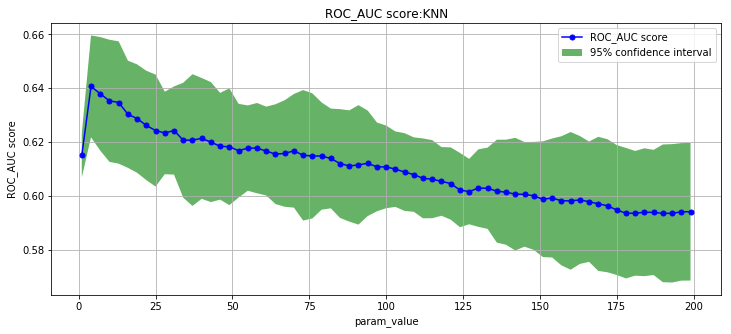

Best parameters:{'n_neighbors': 4}
Best parameters:0.6407160528708574


In [13]:
plotting(param_grid[0]['n_neighbors'],
         searcher.cv_results_['mean_test_score'],
         searcher.cv_results_['std_test_score'], "KNN")

print("Best parameters:{}".format(searcher.best_params_))
print("Best parameters:{}".format(searcher.best_score_))

#### Plot histograms for age, fnlwgt, capital-gain. What do you observe?

# ***SOLUTION

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 936x216 with 0 Axes>

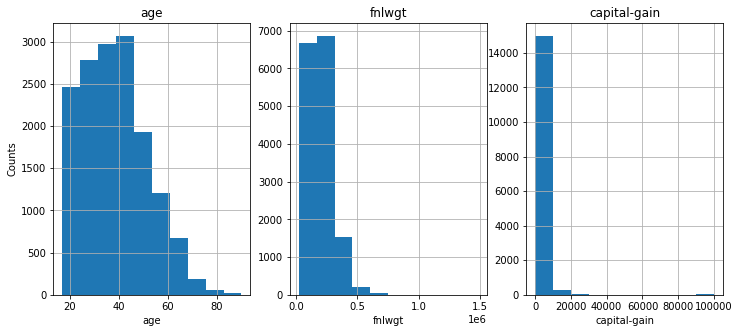

In [14]:
plt.figure(figsize=[13,3])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = False)

ax1.set_title("age")
ax1.set_xlabel("age")
ax1.set_ylabel("Counts")
num_data['age'].hist(bins = 10, normed = False, ax = ax1)

ax2.set_title("fnlwgt")
ax2.set_xlabel("fnlwgt")
ax2.ticklabel_format(axis='x', style='sci', scilimits=(0,3))
num_data['fnlwgt'].hist(bins = 10, normed = False, ax = ax2)

ax3.set_title("capital-gain")
ax3.set_xlabel("capital-gain")
num_data['capital-gain'].hist(bins = 10, normed = False, ax = ax3)

We now scale the data, using inbuild Standard Scaler, which standartised features - makes zero mean and unit variance. 

In [15]:
from sklearn.preprocessing import StandardScaler
num_data_scaled = StandardScaler().fit_transform(num_data)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# ***SOLUTION

In [16]:
params_region = list(np.arange(1, 200, 3))
param_grid = [{'n_neighbors': params_region}]
knn = KNeighborsClassifier(n_jobs=-1)


searcher = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
searcher.fit(num_data_scaled, y_train.values);

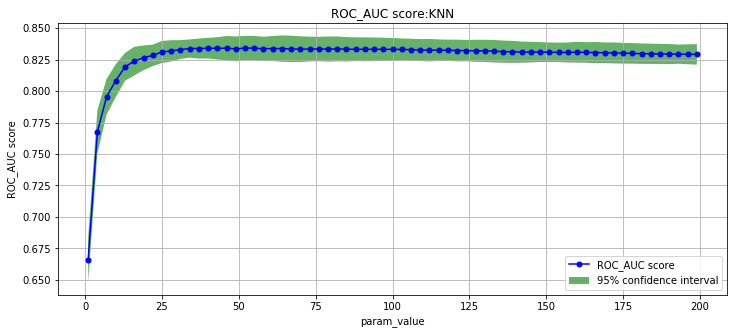

Best parameters:{'n_neighbors': 52}
Best parameters:0.834122995586176


In [17]:
plotting(param_grid[0]['n_neighbors'],
         searcher.cv_results_['mean_test_score'],
         searcher.cv_results_['std_test_score'], "KNN")

print("Best parameters:{}".format(searcher.best_params_))
print("Best parameters:{}".format(searcher.best_score_))

## Remember we had categorical features? Lets try to use them, for the same best n_neighbours we have found. Befor we need to encode them - create one-hot encoded representation.

In [18]:
one_hot_data = pd.get_dummies(str_data)
print (one_hot_data.shape)
one_hot_data.head(5)

(15347, 57)


,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [19]:
from sklearn.preprocessing import StandardScaler
merged_data = one_hot_data.join(num_data)
merged_data.iloc[:, -6:] = StandardScaler().fit_transform(merged_data.iloc[:, -6:])
merged_data.head(3)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,race_Other,race_White,sex_Female,sex_Male,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,-0.342919,0.900258,-0.450788,-0.065600,-0.21874,1.588223
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0.114760,0.010683,-0.059086,-0.150439,-0.21874,-0.074178
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,-0.190359,-0.106280,1.116020,-0.150439,-0.21874,-0.074178


In [20]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=52, metric='minkowski', n_jobs=-1)

print("Result:{}".format(np.mean(cross_val_score(knn, merged_data, y_train, scoring='roc_auc', n_jobs=-1, cv=5))))

Result:0.8927141107705721


In [21]:
%%html
<img src=http://dogr.io/wow/suchresult/sooneenhot.png width="300">

# Bonus quest 

Try different parameters of KNN such as weights or metric.